In [1]:
import pandas as pd
import numpy as np

columns_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

df = pd.read_csv('adult.data', header=0, skip_blank_lines=True, names=columns_names)

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [2]:
# Remove spaces from the data
df=df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [3]:
# Change income to numerical value
df['income'] = df['income'].replace({'<=50K':0,'>50K':1})

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


# Data Preparation

In [5]:
# Checking NaN values in the data
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
# checking '?' in the data
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [7]:
# We are replacing '?' with NaN values
df = df.replace(to_replace='?', value=np.nan)

In [8]:
# Checking NaN values in the data 
print("\n Missing values \n")
print(df.isna().sum())



 Missing values 

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [9]:
# Calculate percentage of missing values for each column
missing_percent = df.isna().mean() * 100

# Print the percentage of missing values
print(missing_percent)


age               0.000000
workclass         5.638821
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.660319
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.790541
income            0.000000
dtype: float64


In [10]:
# use mode imputation (the most frequent value) to fill in the missing values
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True)

# checking missing values after imputation 
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

#  Exploratory Data Analysis 

| Feature        |   Min |   Median |        Mean |            Max |
|----------------|-------|----------|-------------|----------------|
| age            |    17 |       37 |     38.5816 |    90          |
| fnlwgt         | 12285 |   178363 | 189782      |     1.4847e+06 |
| education_num  |     1 |       10 |     10.0806 |    16          |
| hours_per_week |     1 |       40 |     40.4375 |    99          |
| capital_gain   |     0 |        0 |   1077.62   | 99999          |
| capital_loss   |     0 |        0 |     87.3065 |  4356          |


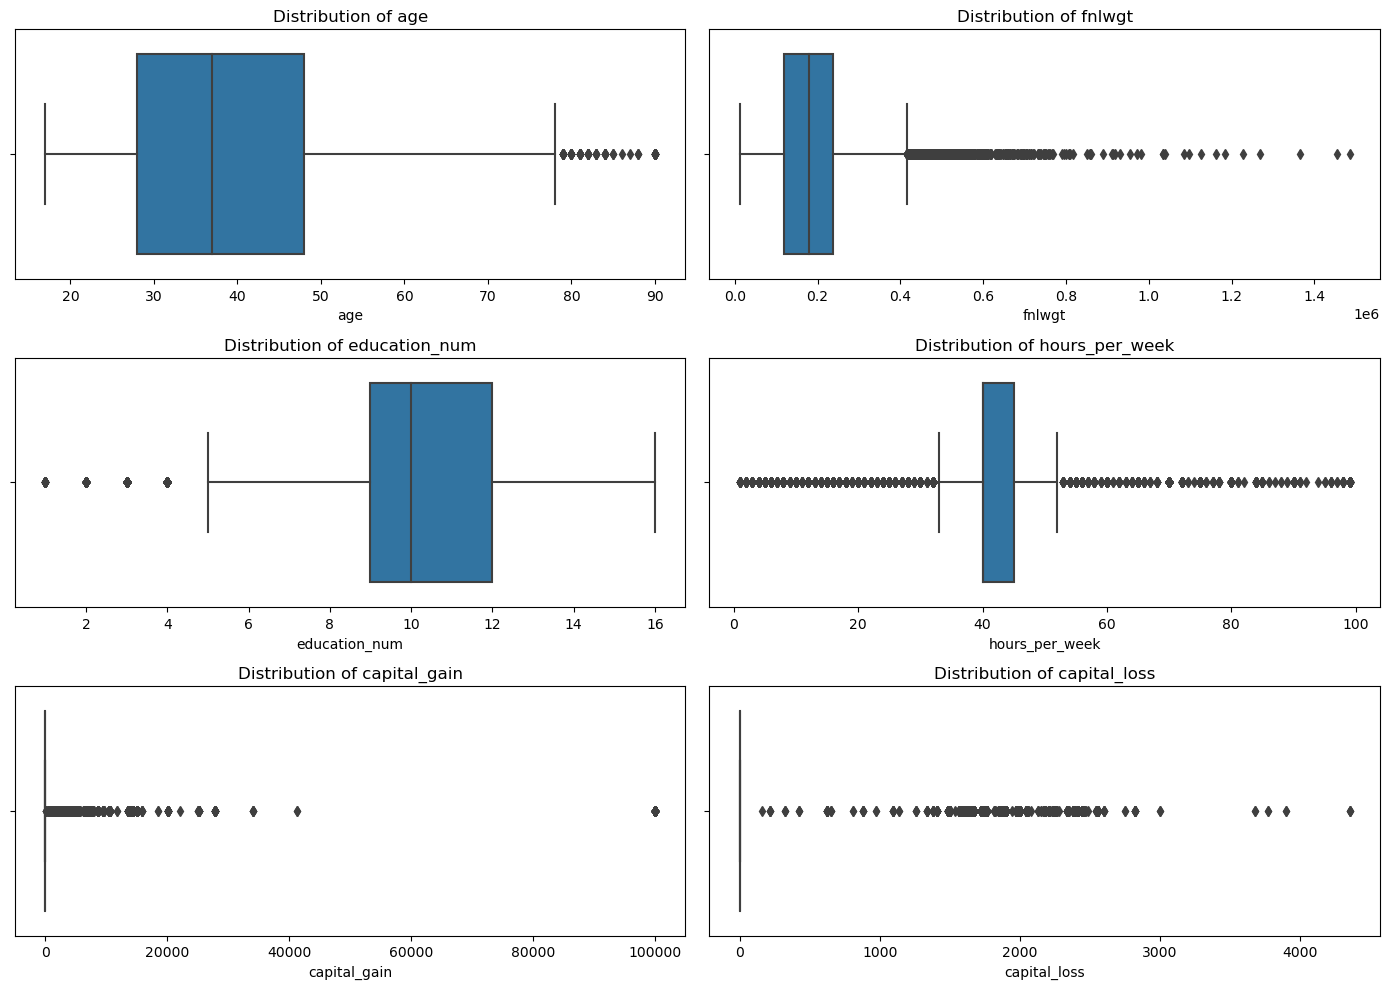

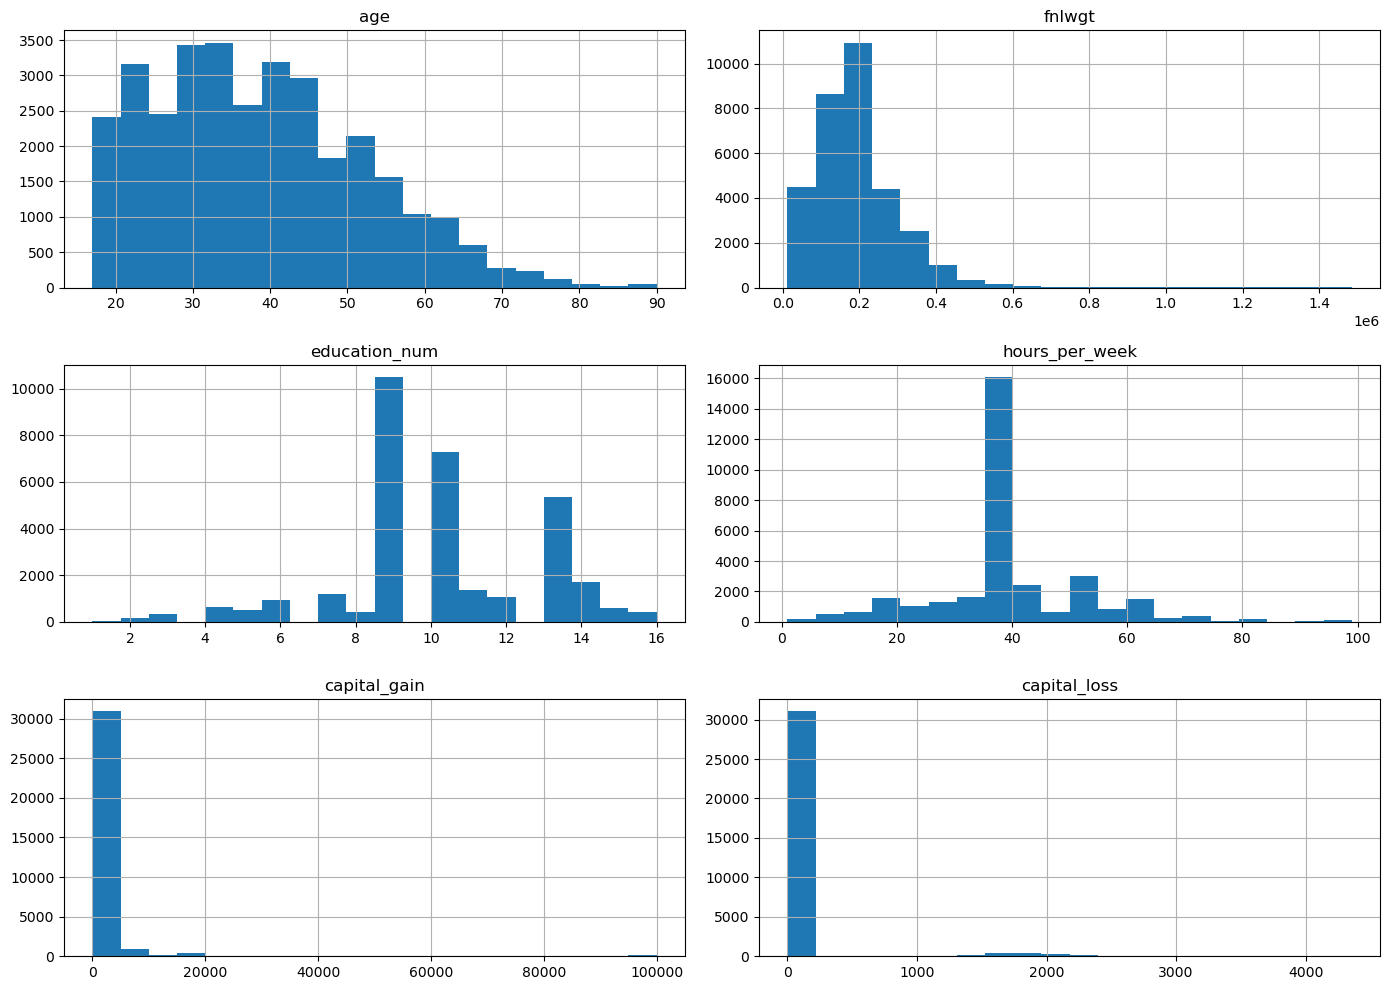

Skewness of Numerical Features:
 age                0.558738
fnlwgt             1.446972
education_num     -0.311630
hours_per_week     0.227636
capital_gain      11.953690
capital_loss       4.594549
dtype: float64


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Summary Statistics
import pandas as pd
from tabulate import tabulate

# Select numerical columns for summary
numerical_features = ['age', 'fnlwgt', 'education_num', 'hours_per_week', 'capital_gain', 'capital_loss']

# Calculate statistics
summary_stats = pd.DataFrame({
    'Min': df[numerical_features].min(),
    'Median': df[numerical_features].median(),
    'Mean': df[numerical_features].mean(),
    'Max': df[numerical_features].max()
})

# Create the summary table in a nice format
summary_table = tabulate(summary_stats, headers=['Feature', 'Min', 'Median', 'Mean', 'Max'], tablefmt='github')

# Display the summary table
print(summary_table)


# Box Plots
plt.figure(figsize=(14, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Histograms
df[numerical_features].hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

# Skewness
skewness = df[numerical_features].skew()
print("Skewness of Numerical Features:\n", skewness)


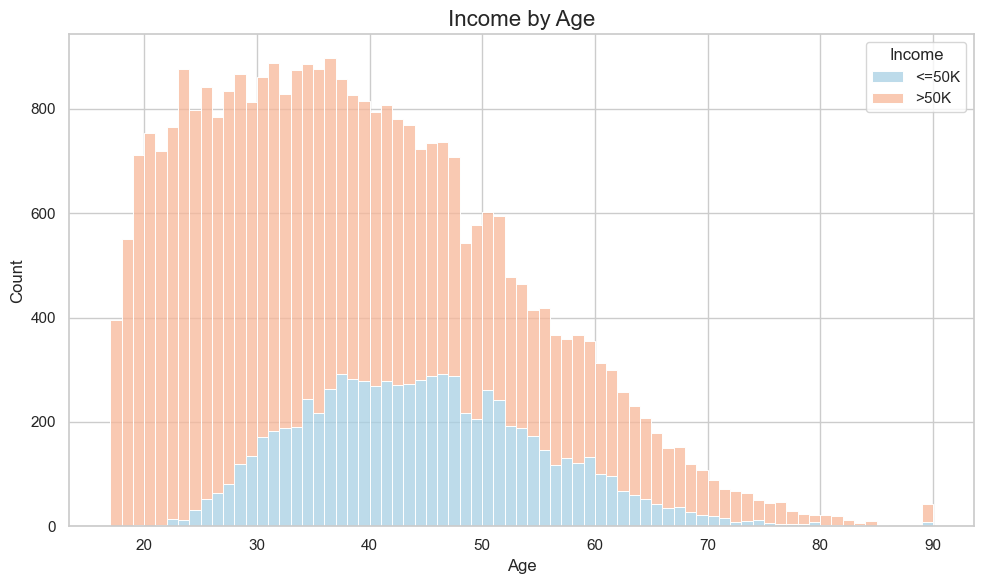

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set a minimalistic style
sns.set(style="whitegrid")

# Make sure the income column is a categorical type
df['income'] = df['income'].astype('category')

# Create the first plot: income by age
plt.figure(figsize=(10, 6))

# Create the histogram with a smaller bin width for more granularity
sns.histplot(data=df, x='age', hue='income', multiple='stack', palette='RdBu', binwidth=1)

# Adding title and labels
plt.title('Income by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Fix the legend by explicitly setting labels
plt.legend(title='Income', labels=['<=50K', '>50K'])

# Display the plot
plt.tight_layout()
plt.show()




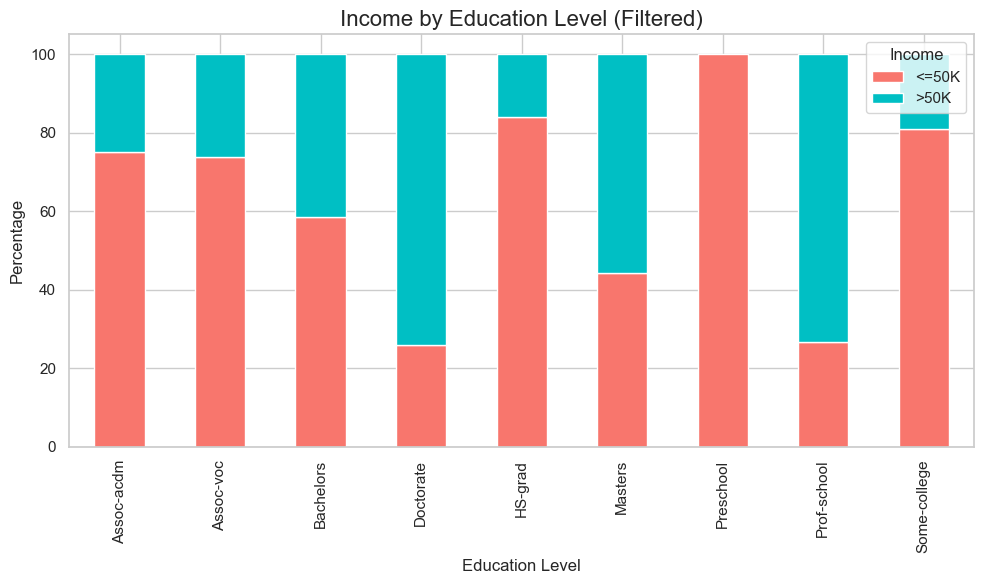

In [13]:
# List of education levels to exclude
exclude_education_levels = ['1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']

# Filter the dataset to exclude these education levels
filtered_df = df[~df['education'].isin(exclude_education_levels)]

# Recreate the normalized crosstab with the filtered dataset
education_income_filtered = pd.crosstab(filtered_df['education'], filtered_df['income'], normalize='index') * 100

# Plot the stacked bar plot with the filtered data
education_income_filtered.plot(kind='bar', stacked=True, color=['#F8766D', '#00BFC4'], figsize=(10, 6))

# Add titles and labels
plt.title('Income by Education Level (Filtered)', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Fix the legend with appropriate labels
plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])

# Display the plot
plt.tight_layout()
plt.show()


In [14]:
# dropping education number column, education and education number column are just the same
df.drop(labels='education_num', axis=1, inplace=True)

In [15]:
# Transforming Maritial Status column with value as either married or not married.
df = df.replace({'Married-civ-spouse':'married','Married-AF-spouse':'married','Married-spouse-absent':'married',
                    'Never-married':'not married','Divorced':'not married','Separated':'not married','Widowed':'not married'})

In [16]:
# Transforming native country column with value as either United States or Other.
countries = df['native_country'].unique()[1:]
df['native_country'] = df['native_country'].replace(to_replace=countries, value='Other')

In [17]:
# Categorical features
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(include=['int64'])

# Categorical column with their unique value
for i in cat_df.columns:
    print("{} : {} \n".format(i, cat_df[i].unique()))

workclass : ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital_status : ['married' 'not married'] 

occupation : ['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv'] 

relationship : ['Husband' 'Not-in-family' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex : ['Male' 'Female'] 

native_country : ['United-States' 'Other'] 



In [18]:
# Creating dummies variables
df_dummie = pd.get_dummies(df,drop_first=True, dtype=int)
df_dummie.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_United-States,income_1
0,50,83311,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
1,38,215646,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
2,53,234721,0,0,40,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
3,28,338409,0,0,40,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4,37,284582,0,0,40,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [19]:
from sklearn.preprocessing import LabelEncoder
temp_data = df.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['income'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

marital_status    0.434935
relationship      0.250924
age               0.234039
hours_per_week    0.229690
capital_gain      0.223333
sex               0.215995
capital_loss      0.150523
education         0.079311
race              0.071853
native_country    0.038948
occupation        0.034599
fnlwgt            0.009481
workclass         0.002739
dtype: float64


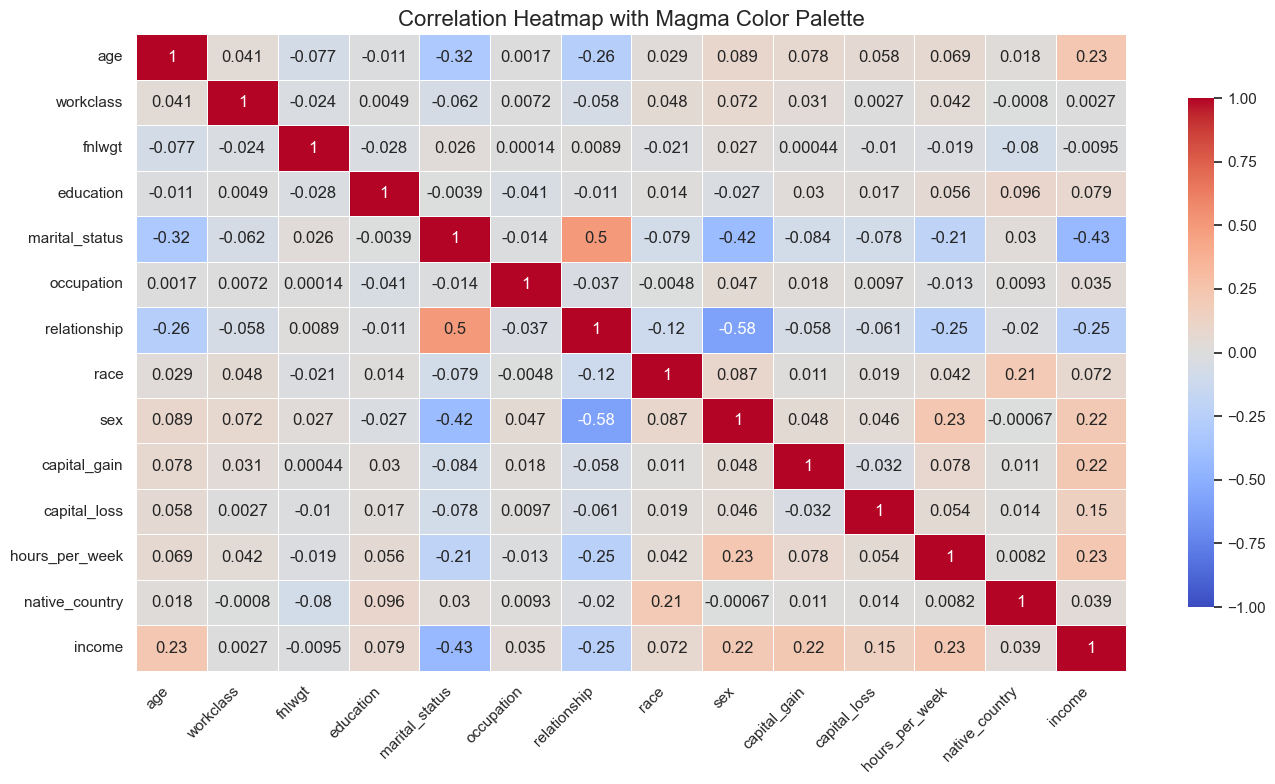

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap with a smoother, visually appealing color palette
plt.figure(figsize=(14, 8))

# Use the 'magma' color palette for a warmer, subtler gradient
sns.heatmap(temp_data.corr(), annot=True, cmap='coolwarm', vmax=1, vmin=-1, center=0, linewidths=0.5, cbar_kws={"shrink": .8})

# Display the plot with title and formatting
plt.title('Correlation Heatmap with Magma Color Palette', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()





In [21]:
# Droping those features which we are not going to use
final_features = df_dummie.drop(['fnlwgt','workclass_Local-gov', 'workclass_Never-worked','workclass_Private',
                                         'workclass_Self-emp-inc','workclass_Self-emp-not-inc', 'workclass_State-gov',
                                         'workclass_Without-pay'], axis=1)

In [22]:
# print("Total No. of features after creating dummie variable : {}\n".format(len(df_dummie.columns)))
# print('--Features--\n')
# for i in df_dummie.columns:S
  #  print(i)
# print('---------------------------')

In [23]:
X = final_features.drop(['income_1'],axis=1)
y = final_features['income_1']

# Feature scaling on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])

input_scaled = scaler.transform(X[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])
scaled_data = pd.DataFrame(input_scaled,columns=['age', 'capital_gain', 'capital_loss', 'hours_per_week'])

X_scaled = scaled_data.join(X.drop(['age','capital_gain', 'capital_loss','hours_per_week'],axis=1))

In [24]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Checking the shapes of the resulting datasets
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (26048, 44)
X_test shape: (6512, 44)
y_train shape: (26048,)
y_test shape: (6512,)


# Random Forest Classifier

In [25]:
# Model Building
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10,random_state=0)

# Training Model
dt.fit(x_train,y_train)
 
# Model Summary
y_pred_dt = dt.predict(x_test)
y_pred_train_dt = dt.predict(x_train)

In [26]:
# Model Building
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=30)

# Training Model
rfc.fit(x_train,y_train)

# Model summary
y_pred_rfc = rfc.predict(x_test)
y_pred_train_rfc = rfc.predict(x_train)

In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Evaluate model performance
print("-----Test Data Accuracy----")
print("Accuracy score:", accuracy_score(y_test, y_pred_rfc))
print("F1 score:", f1_score(y_test, y_pred_rfc))
print("Precision score:", precision_score(y_test, y_pred_rfc))
print("Recall score:", recall_score(y_test, y_pred_rfc))

print("\n-----Train Data Accuracy----")
print("Accuracy score:", accuracy_score(y_train, y_pred_train_rfc))
print("F1 score:", f1_score(y_train, y_pred_train_rfc))
print("Precision score:", precision_score(y_train, y_pred_train_rfc))
print("Recall score:", recall_score(y_train, y_pred_train_rfc))

-----Test Data Accuracy----
Accuracy score: 0.8484336609336609
F1 score: 0.666215759215421
Precision score: 0.7258658806190126
Recall score: 0.615625

-----Train Data Accuracy----
Accuracy score: 0.9593442874692875
F1 score: 0.9119773917380102
Precision score: 0.9474956822107081
Recall score: 0.879025797147893


# Support Vector Classifier

In [28]:
# Model Building
from sklearn.svm import SVC
svc = SVC()

# Training Model
svc.fit(x_train,y_train)
 
# Model Summary
y_pred_svc = svc.predict(x_test)
y_pred_train_svc = svc.predict(x_train)

In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Predictions (you already have these, but repeating here for clarity)
y_pred_svc = svc.predict(x_test)
y_pred_train_svc = svc.predict(x_train)

# Test Data Performance
print("-----Test Data Performance----")
print("Support Vector Classifier:")
print("Accuracy score:", accuracy_score(y_test, y_pred_svc))
print("F1 score:", f1_score(y_test, y_pred_svc))
print("Precision score:", precision_score(y_test, y_pred_svc))
print("Recall score:", recall_score(y_test, y_pred_svc))

# Confusion Matrix for Test Data
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_pred_svc))

# Train Data Performance
print("\n-----Train Data Performance----")
print("Accuracy score:", accuracy_score(y_train, y_pred_train_svc))
print("F1 score:", f1_score(y_train, y_pred_train_svc))
print("Precision score:", precision_score(y_train, y_pred_train_svc))
print("Recall score:", recall_score(y_train, y_pred_train_svc))

# Confusion Matrix for Train Data
print("\nConfusion Matrix (Train Data):")
print(confusion_matrix(y_train, y_pred_train_svc))


-----Test Data Performance----
Support Vector Classifier:
Accuracy score: 0.8533476658476659
F1 score: 0.6633768064857243
Precision score: 0.7607113985448666
Recall score: 0.588125

Confusion Matrix (Test Data):
[[4616  296]
 [ 659  941]]

-----Train Data Performance----
Accuracy score: 0.8617936117936118
F1 score: 0.6689959543949981
Precision score: 0.7848975188781014
Recall score: 0.582919403941676

Confusion Matrix (Train Data):
[[18810   997]
 [ 2603  3638]]


                         Feature  Importance
0                            age    0.235418
1                   capital_gain    0.133549
3                 hours_per_week    0.130589
19    marital_status_not married    0.117267
2                   capital_loss    0.045171
22    occupation_Exec-managerial    0.026715
12           education_Bachelors    0.024618
42                      sex_Male    0.024206
33    relationship_Not-in-family    0.023941
15             education_Masters    0.019389
35        relationship_Own-child    0.017036
14             education_HS-grad    0.014807
28     occupation_Prof-specialty    0.014643
37             relationship_Wife    0.012308
26      occupation_Other-service    0.011235
17         education_Prof-school    0.011193
43  native_country_United-States    0.010973
18        education_Some-college    0.009664
13           education_Doctorate    0.009347
36        relationship_Unmarried    0.009043
41                    race_White    0.008792
30        

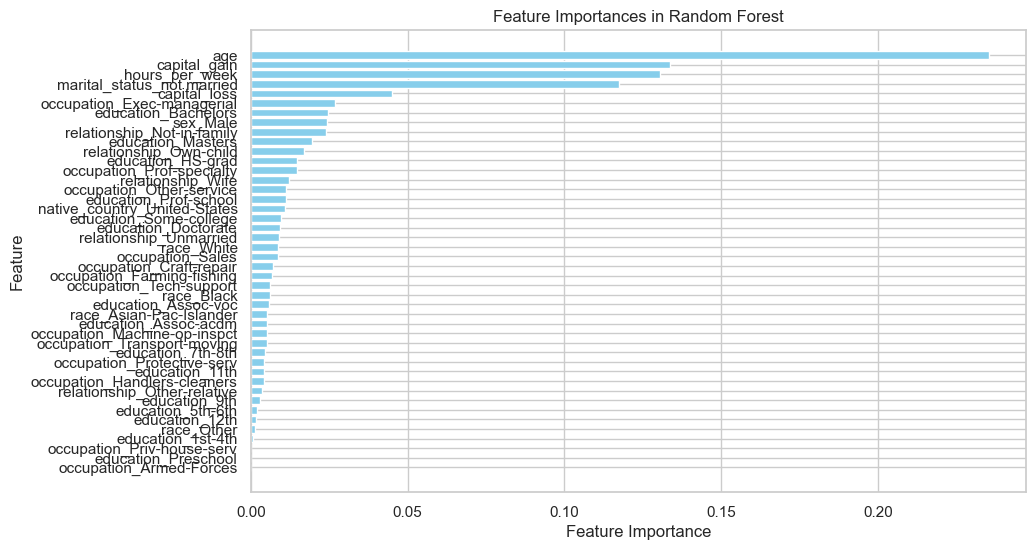

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the RandomForestClassifier
importances = rfc.feature_importances_

# Create a DataFrame to visualize the importance
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
})

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()


# Hyper Parameters


In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[50, 100, 250],
    'max_depth':[5, 10, 30, None],
    'min_samples_split':[2, 4],
    'max_features':['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                          param_grid=param_grid, verbose=10)

# Fit the randomized search to the data
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.828 total time=   0.2s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.3s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.829 total time=   0.3s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.823 total time=   0.3s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

[CV 4/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.821 total time=   0.5s
[CV 5/5; 8/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100
[CV 5/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.828 total time=   0.4s
[CV 1/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 1/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.821 total time=   1.3s
[CV 2/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 2/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.834 total time=   1.2s
[CV 3/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 3/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.823 total time=   1.3s
[CV 4/5; 9/48] START max_d

[CV 3/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.855 total time=   0.4s
[CV 4/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 4/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.852 total time=   0.4s
[CV 5/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 5/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.860 total time=   0.4s
[CV 1/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 1/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.857 total time=   0.9s
[CV 2/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 2/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.862 total time=   0.9s
[CV 3/5; 17/4

[CV 1/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.857 total time=   2.1s
[CV 2/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 2/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.862 total time=   2.2s
[CV 3/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 3/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.854 total time=   2.2s
[CV 4/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 4/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.853 total time=   2.1s
[CV 5/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 5/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.861 total time=   2.0s
[CV 1/5;

[CV 4/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.840 total time=   1.0s
[CV 5/5; 31/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50
[CV 5/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.843 total time=   0.9s
[CV 1/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 1/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.847 total time=   1.9s
[CV 2/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 2/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.855 total time=   1.9s
[CV 3/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 3/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.842 total time=   1.9s
[CV 4/5; 32

[CV 2/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.849 total time=   5.4s
[CV 3/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 3/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.837 total time=   5.1s
[CV 4/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 4/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.835 total time=   5.7s
[CV 5/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 5/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.839 total time=   5.1s
[CV 1/5; 40/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 1/5; 40/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.852 total time=

[CV 5/5; 46/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.846 total time=   0.8s
[CV 1/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 1/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.849 total time=   1.6s
[CV 2/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 2/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.856 total time=   1.6s
[CV 3/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 3/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.843 total time=   1.7s
[CV 4/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 4/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.842 total time

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [32]:
# Retrieve the best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best hyperparameters found: ", best_params)


Best hyperparameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}


In [33]:
# Predictions on the test set using the best model
y_pred_test = best_model.predict(x_test)

# Predictions on the training set
y_pred_train = best_model.predict(x_train)


In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Test Data Performance
print("-----Test Data Performance (After Hyperparameter Tuning)----")
print("Accuracy score:", accuracy_score(y_test, y_pred_test))
print("F1 score:", f1_score(y_test, y_pred_test))
print("Precision score:", precision_score(y_test, y_pred_test))
print("Recall score:", recall_score(y_test, y_pred_test))

# Train Data Performance
print("\n-----Train Data Performance (After Hyperparameter Tuning)----")
print("Accuracy score:", accuracy_score(y_train, y_pred_train))
print("F1 score:", f1_score(y_train, y_pred_train))
print("Precision score:", precision_score(y_train, y_pred_train))
print("Recall score:", recall_score(y_train, y_pred_train))


-----Test Data Performance (After Hyperparameter Tuning)----
Accuracy score: 0.8567260442260443
F1 score: 0.6514755323122899
Precision score: 0.8096564531104921
Recall score: 0.545

-----Train Data Performance (After Hyperparameter Tuning)----
Accuracy score: 0.8648648648648649
F1 score: 0.6586501163692785
Precision score: 0.8341930729550479
Recall score: 0.5441435667361


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the grid search model to the training data
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found:", best_params)


Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best hyperparameters found: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Predictions using the best model after tuning
y_pred_test = best_model.predict(x_test)
y_pred_train = best_model.predict(x_train)

# Test Data Performance
print("-----Test Data Performance (After Hyperparameter Tuning)----")
print("Support Vector Classifier (After Tuning):")
print("Accuracy score:", accuracy_score(y_test, y_pred_test))
print("F1 score:", f1_score(y_test, y_pred_test))
print("Precision score:", precision_score(y_test, y_pred_test))
print("Recall score:", recall_score(y_test, y_pred_test))

# Confusion Matrix for Test Data
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_pred_test))

# Train Data Performance
print("\n-----Train Data Performance (After Hyperparameter Tuning)----")
print("Accuracy score:", accuracy_score(y_train, y_pred_train))
print("F1 score:", f1_score(y_train, y_pred_train))
print("Precision score:", precision_score(y_train, y_pred_train))
print("Recall score:", recall_score(y_train, y_pred_train))

# Confusion Matrix for Train Data
print("\nConfusion Matrix (Train Data):")
print(confusion_matrix(y_train, y_pred_train))


-----Test Data Performance (After Hyperparameter Tuning)----
Support Vector Classifier (After Tuning):
Accuracy score: 0.8539619164619164
F1 score: 0.6636009904492395
Precision score: 0.7644661776691116
Recall score: 0.58625

Confusion Matrix (Test Data):
[[4623  289]
 [ 662  938]]

-----Train Data Performance (After Hyperparameter Tuning)----
Accuracy score: 0.8603347665847666
F1 score: 0.6637086337585506
Precision score: 0.7843565654358751
Recall score: 0.5752283287934626

Confusion Matrix (Train Data):
[[18820   987]
 [ 2651  3590]]
